## Results


In [47]:
import statistics
import pickle
import matplotlib.pyplot as plt
import numpy as np

from settings_file import *


In [48]:
eval_test0 = np.load('results/testing_results/training0/eval.npy')
eval_test1 = np.load('results/testing_results/training1/eval.npy')
eval_test2 = np.load('results/testing_results/training2/eval.npy')
eval_test3 = np.load('results/testing_results/training3/eval.npy')

rwd_idx = 0
temp_idx = 1
volt_idx = 2
chgT_idx = 3

## 1. Testing performance

In [49]:
testing_rwd = np.stack((eval_test0[:,rwd_idx],
                        eval_test1[:,rwd_idx],
                        eval_test2[:,rwd_idx],
                        eval_test3[:,rwd_idx]))
episodes_vec = np.arange(0,3010,10)

/tmp/ipykernel_51194/1744876174.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


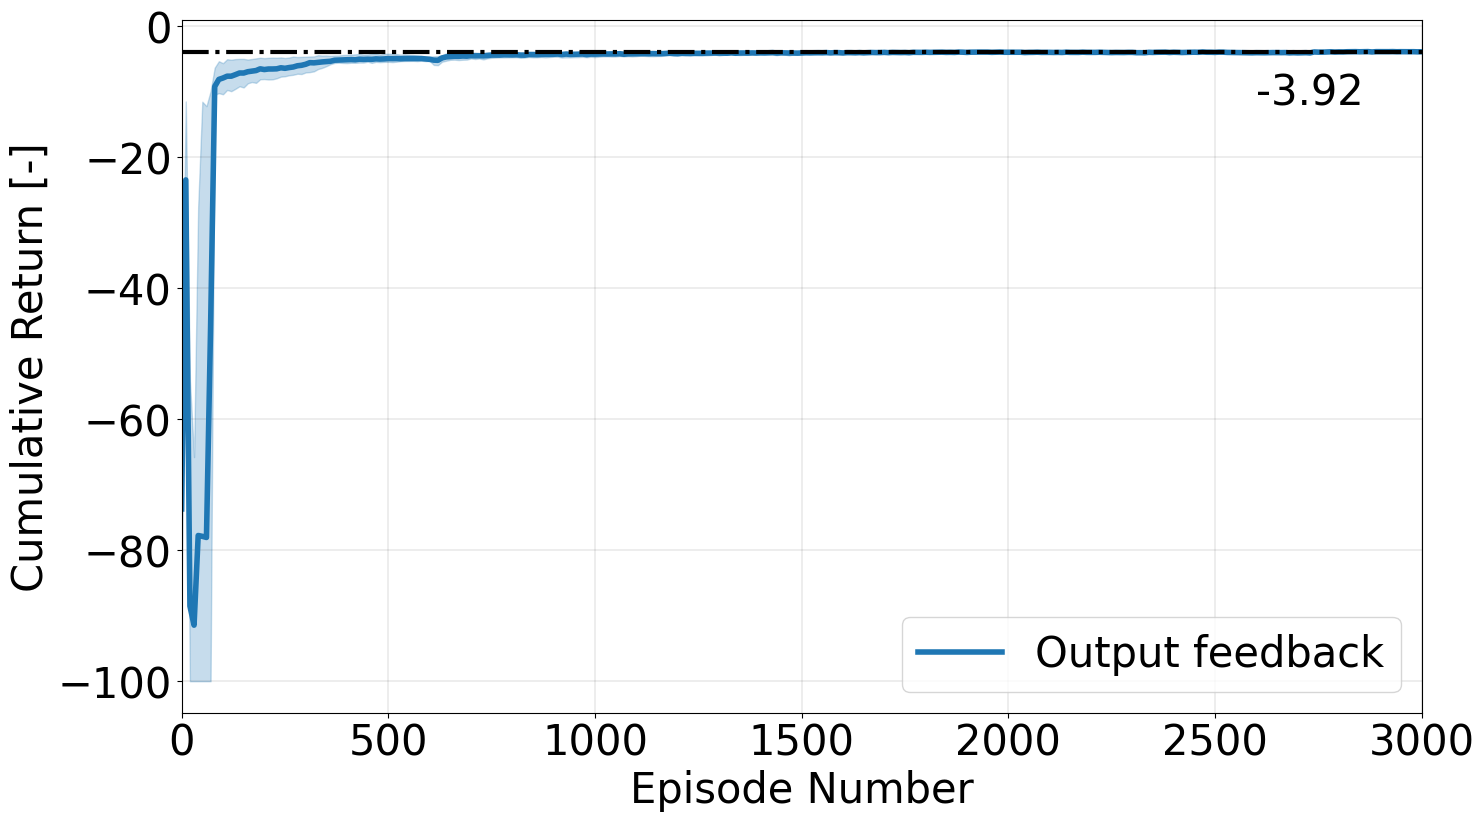

In [50]:
save_fig = True

labels = 'Output feedback'
results = testing_rwd
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))

# plt.title("Testing Peformance", fontsize=25, fontweight="bold")
# plt.title("Learning Curve", fontsize=25, fontweight="bold")
plt.ylabel('Cumulative Return [-]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='lower right')
last_mean_value = np.round(np.mean(results[:,-1]),decimals=2)

plt.plot(episodes_vec, last_mean_value*np.ones(epi_len), 'k-.', linewidth=3)
plt.text(2600, -12, str(last_mean_value), fontsize=30)

if save_fig:
    plt.savefig('figures/Training_output_25degC_LearningCurve.pdf', format='pdf')


## 2. Temperature Constraint

In [51]:
testing_temp_vio = np.stack((eval_test0[:,temp_idx],
                        eval_test1[:,temp_idx],
                        eval_test2[:,temp_idx],
                        eval_test3[:,temp_idx]))
episodes_vec = np.arange(0,3010,10)

/tmp/ipykernel_51194/417934489.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


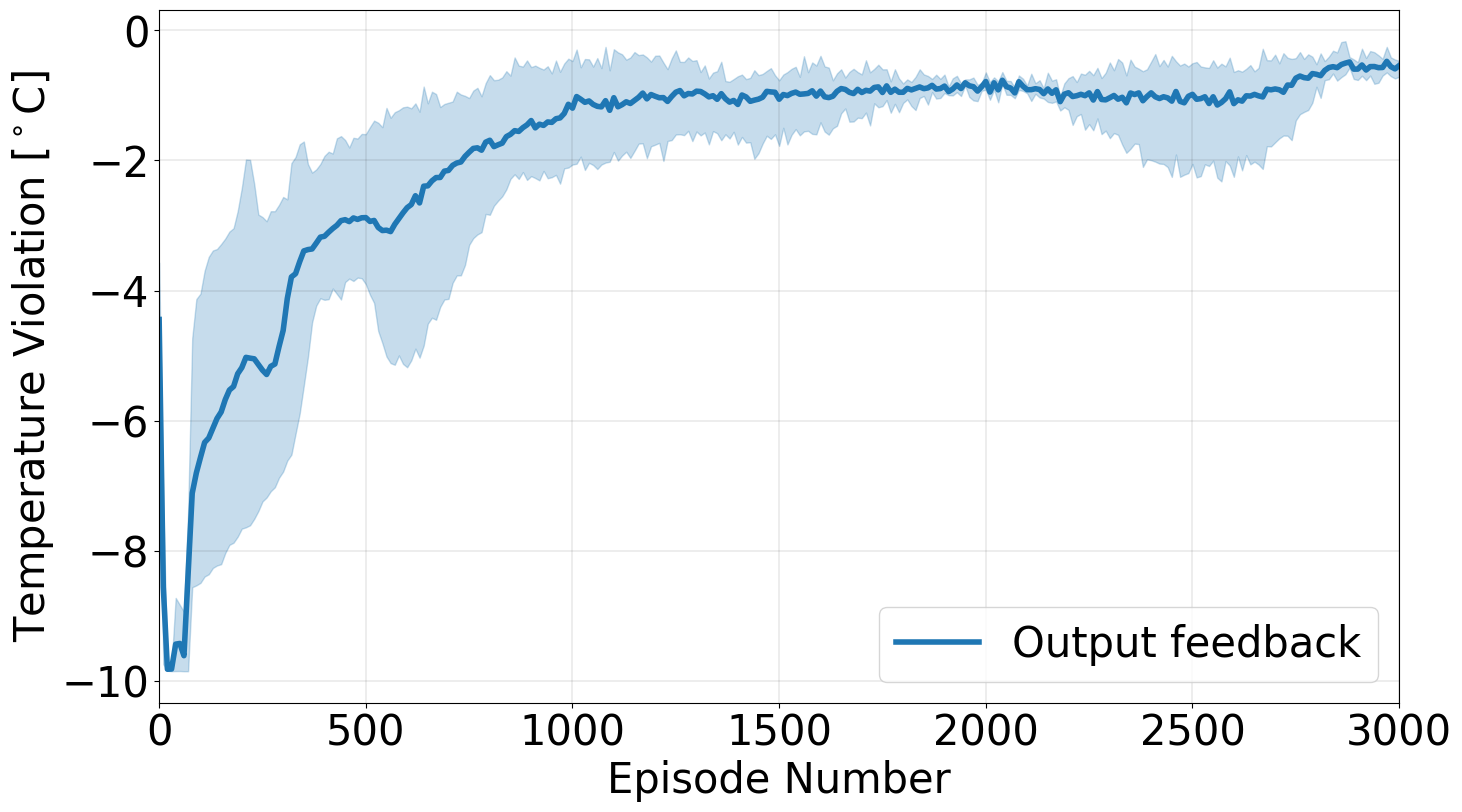

In [52]:
save_fig = True


labels = 'Output feedback'
results = testing_temp_vio - control_settings['constraints']['temperature']['max']
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))

# plt.title("Temperature Constraint Violation", fontsize=25, fontweight="bold")
plt.ylabel('Temperature Violation [$^\circ$C]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='lower right')

if save_fig:
    plt.savefig('figures/Training_output_25degC_Temp_Violation.pdf', format='pdf')


## 3. Voltage Constraint


In [53]:
testing_volt_vio = np.stack((eval_test0[:,volt_idx],
                        eval_test1[:,volt_idx],
                        eval_test2[:,volt_idx],
                        eval_test3[:,volt_idx]))
episodes_vec = np.arange(0,3010,10)

/tmp/ipykernel_51194/1389333606.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


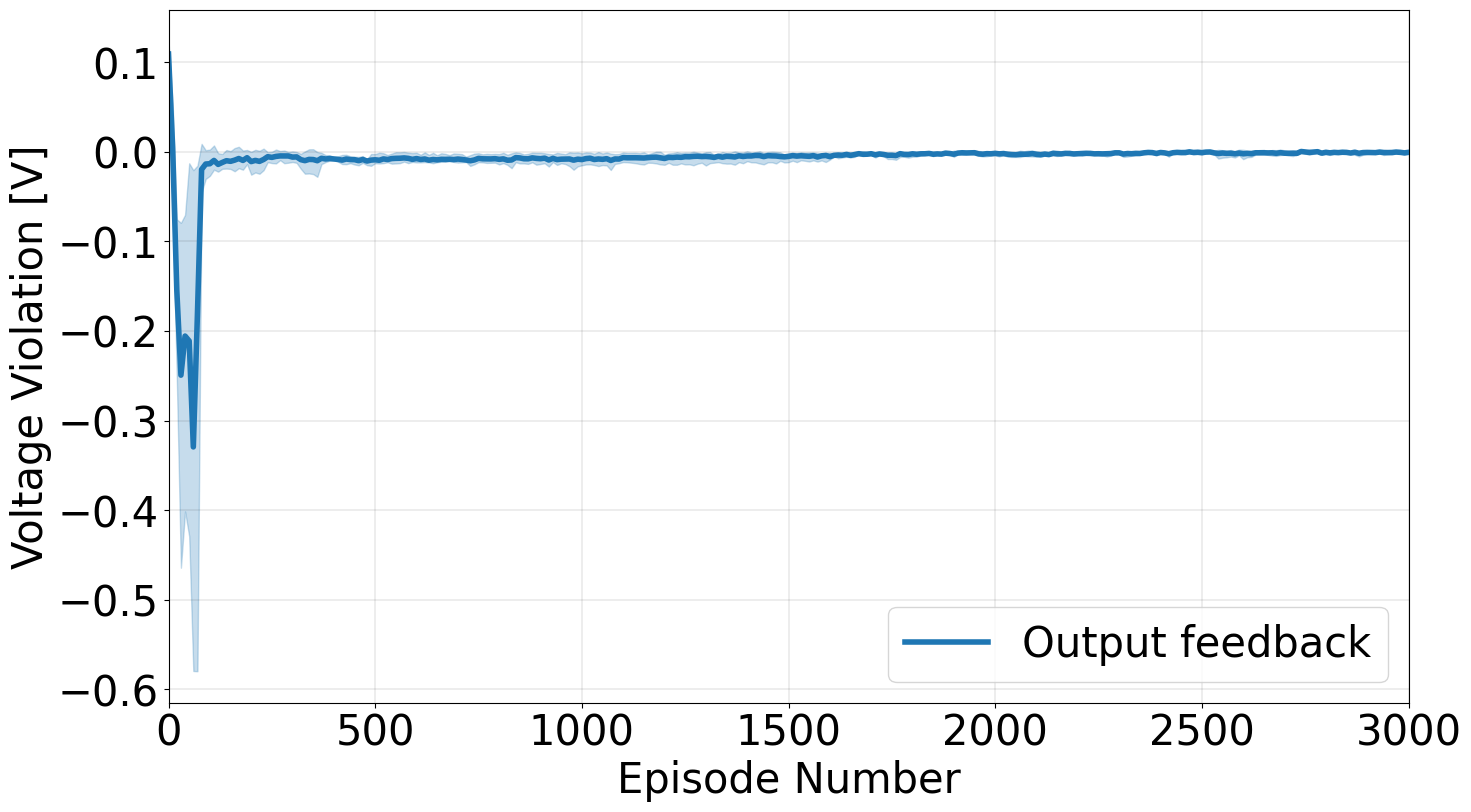

In [54]:
save_fig = True

labels = 'Output feedback'
results = testing_volt_vio - control_settings['constraints']['voltage']['max']
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))

# plt.title(r"Voltage Constraint Violation", fontsize=25, fontweight="bold")
plt.ylabel(r'Voltage Violation [V]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='lower right')

if save_fig:
    plt.savefig('figures/Training_output_25degC_Volt_Violation.pdf', format='pdf')


## 4. Charging Time

In [55]:
testing_chg_time = np.stack((eval_test0[:,chgT_idx],
                        eval_test1[:,chgT_idx],
                        eval_test2[:,chgT_idx],
                        eval_test3[:,chgT_idx]))
episodes_vec = np.arange(0,3010,10)

/tmp/ipykernel_51194/1800407483.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)+1)


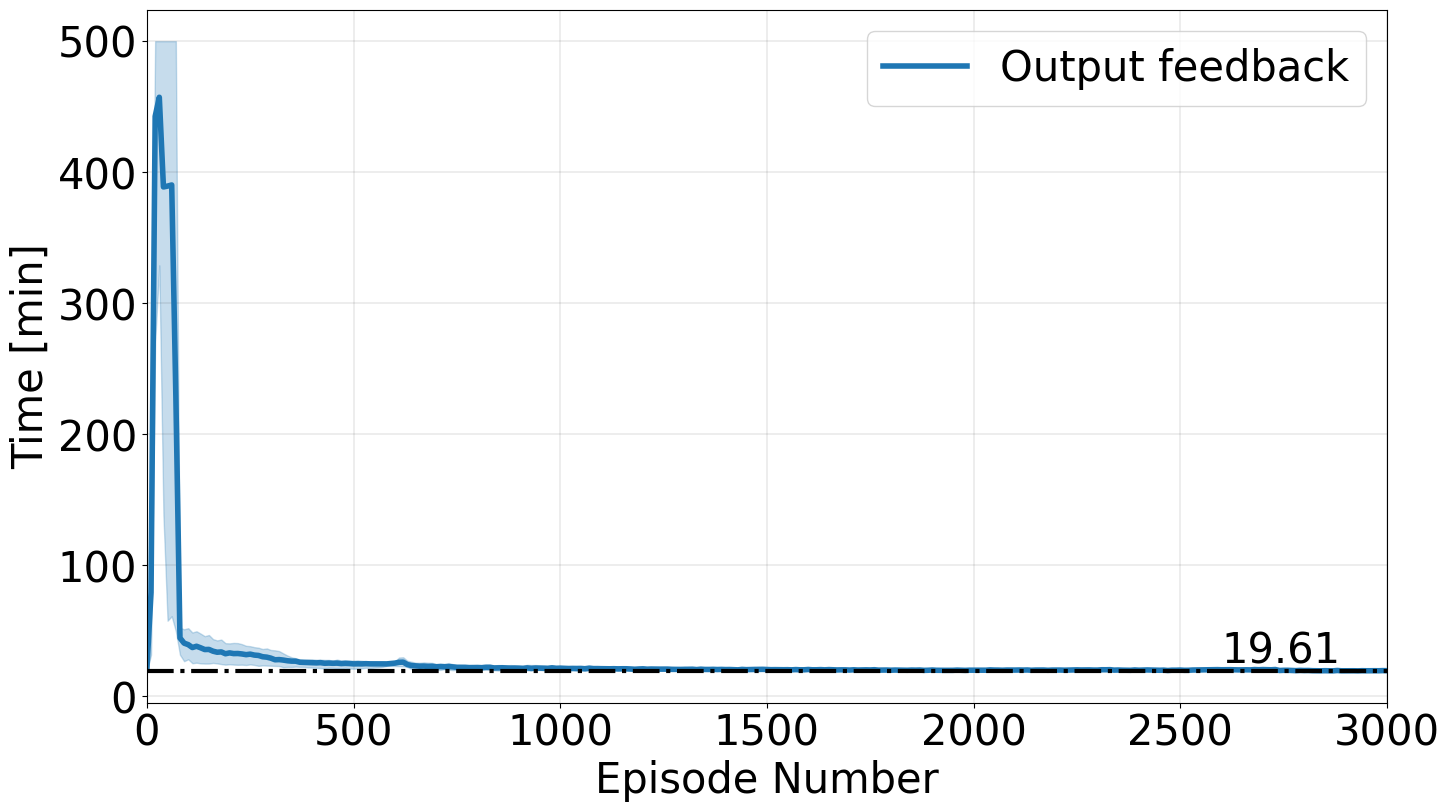

In [56]:
save_fig = True


labels = 'Output feedback'
results = testing_chg_time * settings['sample_time'] / 60 # converted to minutes
colors = plt.cm.get_cmap('tab20', len(labels)+1)
i = 0
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major',axis='both', linestyle='-', color='k', linewidth=0.1)

epi_len = episodes_vec.shape[0]

plt.plot(episodes_vec, np.mean(results[:,:epi_len],0), color=colors(i), linewidth=4, label=labels)
plt.xlim((0,episodes_vec[-1]))
plt.fill_between(episodes_vec, np.min(results[:,:epi_len],0), np.max(results[:,:epi_len],0), alpha=0.25, color=colors(i))
last_mean_value = np.round(np.mean(results[:,-1]),decimals=2)
plt.plot(episodes_vec, last_mean_value*np.ones(epi_len), 'k-.', linewidth=3)
plt.text(2600, 25, str(last_mean_value), fontsize=30)
# plt.title(r"Charging Time", fontsize=25, fontweight="bold")
plt.ylabel(r'Time [min]', fontsize=30)
plt.xlabel('Episode Number', fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize=30,loc='upper right')


if save_fig:
    plt.savefig('figures/Training_output_25degC_ChgTime.pdf', format='pdf')


## 5. Validation

Load trained deep neural network, and validate the control performance in a specific testing condition.

In [57]:
import gym
import torch

from ddpg_agent import Agent
import ipdb

import logz
import scipy.signal
import gym

# import gym_dfn
from gym_dfn.envs.dfn_env import *

from gym_dfn.envs.ParamFile_LCO2 import p

import statistics
import pickle
import os
from settings_file import*

#------------ For PCA 
from numpy import linalg as LA
import scipy.io as sio
# data = sio.loadmat('PCA_DFN_info.mat')
# data_mu = data['time_states_mu']
# data_std = data['time_states_std']
# data_PCA = data['PCA_trans']

In [58]:
def normalize_outputs(soc, voltage, temperature):

    norm_soc = soc - 0.5
    norm_voltage = (voltage - 3.5) / 1.2
    norm_temperature = (temperature - 298 - 10) / (320 - 298)
    norm_output = np.array([norm_soc, norm_voltage, norm_temperature])

    return norm_output

In [59]:
def get_output_observations(bat):
    return bat.SOCn, bat.V, bat.Temp


In [60]:
def denormalize_input(input_value, min_OUTPUT_value, max_OUTPUT_value):
    
    output_value=(1+input_value)*(max_OUTPUT_value-min_OUTPUT_value)/2+min_OUTPUT_value
    
    return output_value

------------------------------------------------
Generating Heatmap of Policy with T = 300
------------------------------------------------


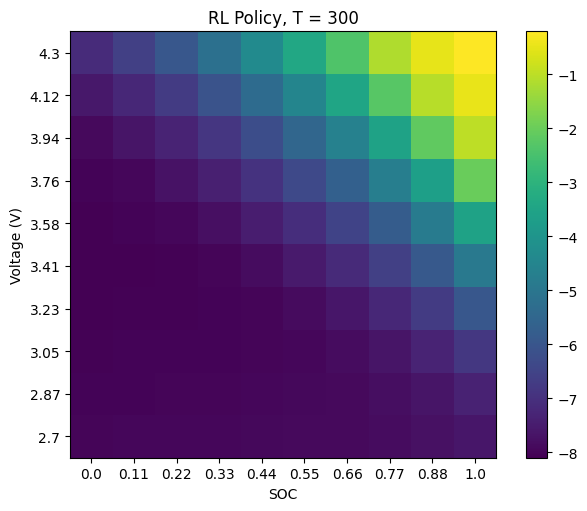

In [61]:

# Policy
agent = Agent(state_size=3, action_size=1, random_seed=1)    

# Load
i_episode=1500

i_training=0
agent.actor_local.load_state_dict(torch.load('results/training_results/training'+str(i_training)+'/episode'+str(i_episode)+'/checkpoint_actor_'+str(i_episode)+'.pth',map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('results/training_results/training'+str(i_training)+'/episode'+str(i_episode)+'/checkpoint_critic_'+str(i_episode)+'.pth',map_location='cpu'))


def policy_heatmap(agent, T = 300, max_current = -2.5*3.4, min_current = 0.):
    print("------------------------------------------------")
    print("Generating Heatmap of Policy with T = "+ str(T))
    print("------------------------------------------------")

    SOC_grid = np.linspace(0,1,10)
    V_grid = np.linspace(2.7,4.3,10)

    ACTION = np.zeros((len(SOC_grid)))

    for V in V_grid:
        ACTION_I = np.array([])
        for soc in SOC_grid:

            norm_out = normalize_outputs(soc,V,T)
            action = agent.act(norm_out, add_noise = False)
            applied_action = denormalize_input(action, max_current, min_current)
            # applied_action = action

            ACTION_I = np.hstack((ACTION_I, applied_action))

        ACTION = np.vstack((ACTION_I, ACTION))

    ACTION = ACTION[:-1]

    nx = SOC_grid.shape[0]
    no_labels_x = nx # how many labels to see on axis x
    step_x = int(nx / (no_labels_x - 1)) # step between consecutive labels
    x_positions = np.arange(0,nx,step_x) # pixel count at label position

    ny = V_grid.shape[0]
    no_labels_y = ny # how many labels to see on axis x
    step_y = int(ny / (no_labels_y - 1)) # step between consecutive labels
    y_positions = np.arange(0,ny,step_x) # pixel count at label position


    plt.imshow(ACTION, interpolation='nearest')
    plt.colorbar()
    plt.xticks(x_positions, np.trunc(100*SOC_grid)/100)
    plt.yticks(y_positions, np.trunc(100*np.flip(V_grid))/100)
    plt.tight_layout()
    plt.title('RL Policy, T = ' + str(T))
    plt.xlabel('SOC')
    plt.ylabel('Voltage (V)')
    plt.show()
    return ACTION

ACTION = policy_heatmap(agent,T = 300)



In [62]:
# Environment
# settings['sample_time']=1
env = DFN(sett=settings, cont_sett=control_settings)

init_V=np.random.uniform(low=3.5, high=3.7)
init_T=np.random.uniform(low=298, high=305)
_ = env.reset(init_v = init_V, init_t=init_T)
soc, voltage, temperature = get_output_observations(env)
norm_out = normalize_outputs(soc,voltage,temperature)

ACTION_VEC=[]
SOC_VEC=[]
T_VEC=[]
VOLTAGE_VEC=[]
RETURN_VALUE=0
TIME_VEC = []
done=False

cex_sim = []
etasLn_sim = []
cssn_sim = []
cssp_sim = []
cavgn_sim = []
cavgp_sim = []
nLis_sim = []

phi_s_n_sim = []
phi_s_p_sim = []
ien_sim = []
iep_sim = []
jn_sim =[]
jp_sim = []
phi_e_sim = []



tt=0
TIME_VEC.append(tt)

for t in range(10000):

    # the exploration noise has been disabled
    norm_action = agent.act(norm_out, add_noise=False)
    

    applied_action=denormalize_input(norm_action,
                                             env.action_space.low[0],
                                             env.action_space.high[0])    

    _,reward,done,_ = env.step(applied_action)
    next_soc, next_voltage, next_temperature = get_output_observations(env)
    norm_next_out = normalize_outputs(next_soc, next_voltage, next_temperature.item())
    
    RETURN_VALUE+=reward
    
    #save the simulation vectors
    ACTION_VEC.append(applied_action[0])
    SOC_VEC.append(env.info['SOCn'])
    T_VEC.append(env.info['T'])
    
    #save the simulation info
    cex_sim.append(env.c_ex)
    etasLn_sim.append(env.etasLn)
    cssn_sim.append(env.cssn)
    cssp_sim.append(env.cssp)
    cavgn_sim.append(env.c_avgn)
    cavgp_sim.append(env.c_avgp)
    nLis_sim.append(env.nLis)
    
    # save the algebraic states info.
    phi_s_n_sim.append(env.out_phisn)
    phi_s_p_sim.append(env.out_phisp)
    ien_sim.append(env.out_ien)
    iep_sim.append(env.out_iep)
    jn_sim.append(env.out_jn)
    jp_sim.append(env.out_jp)
    phi_e_sim.append(env.out_phie)

    tt += env.dt
    TIME_VEC.append(tt)
    VOLTAGE_VEC.append(env.info['V'])
    norm_out=norm_next_out
    
    if done:
        break
    

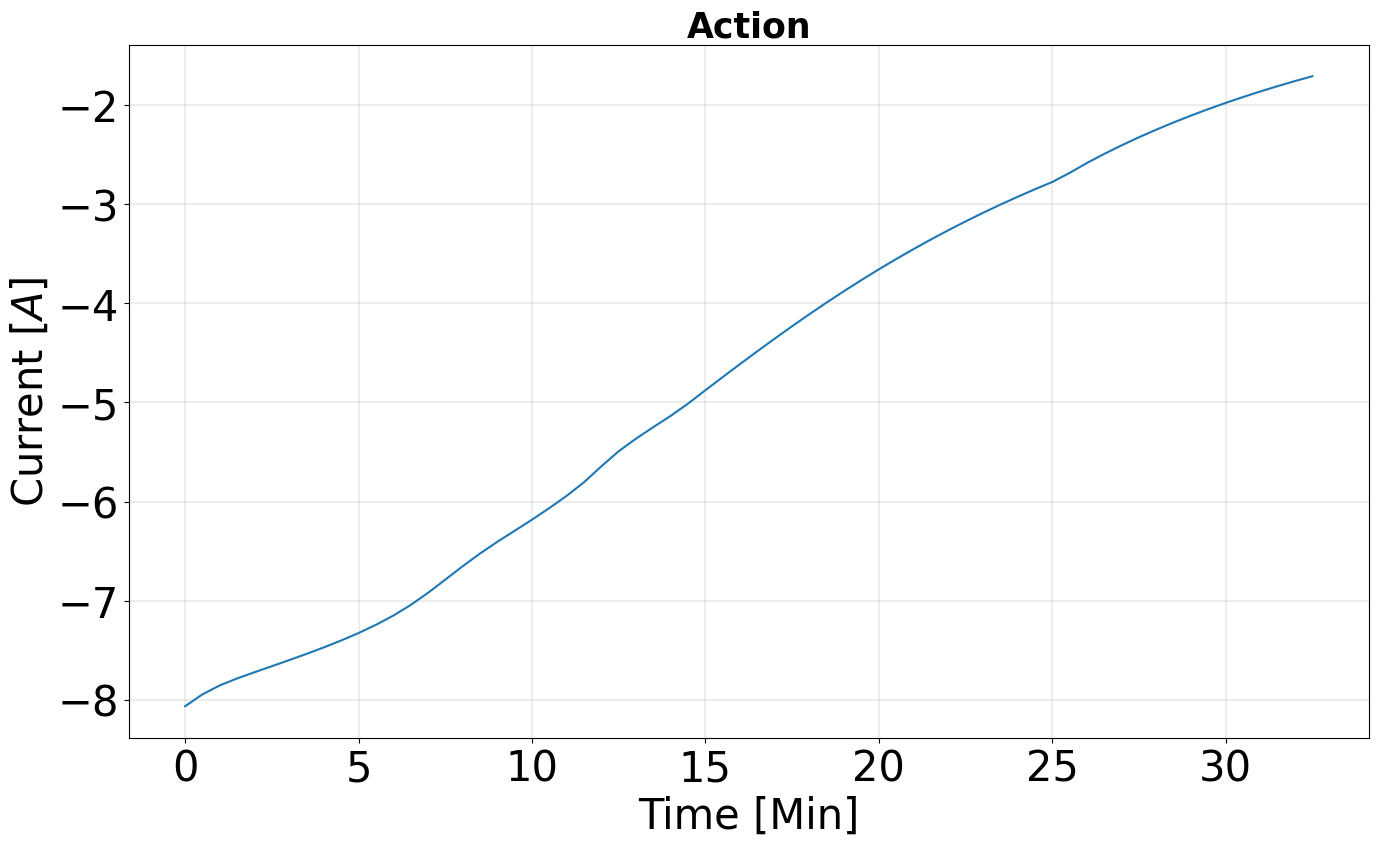

In [63]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)


plt.plot(np.array(TIME_VEC[:-1])/60,np.array(ACTION_VEC))
plt.title("Action", fontsize=25, fontweight="bold")
plt.ylabel(r'Current [$A$]', fontsize=30)
plt.xlabel('Time [Min]', fontsize=30)
plt.tick_params(labelsize=30)

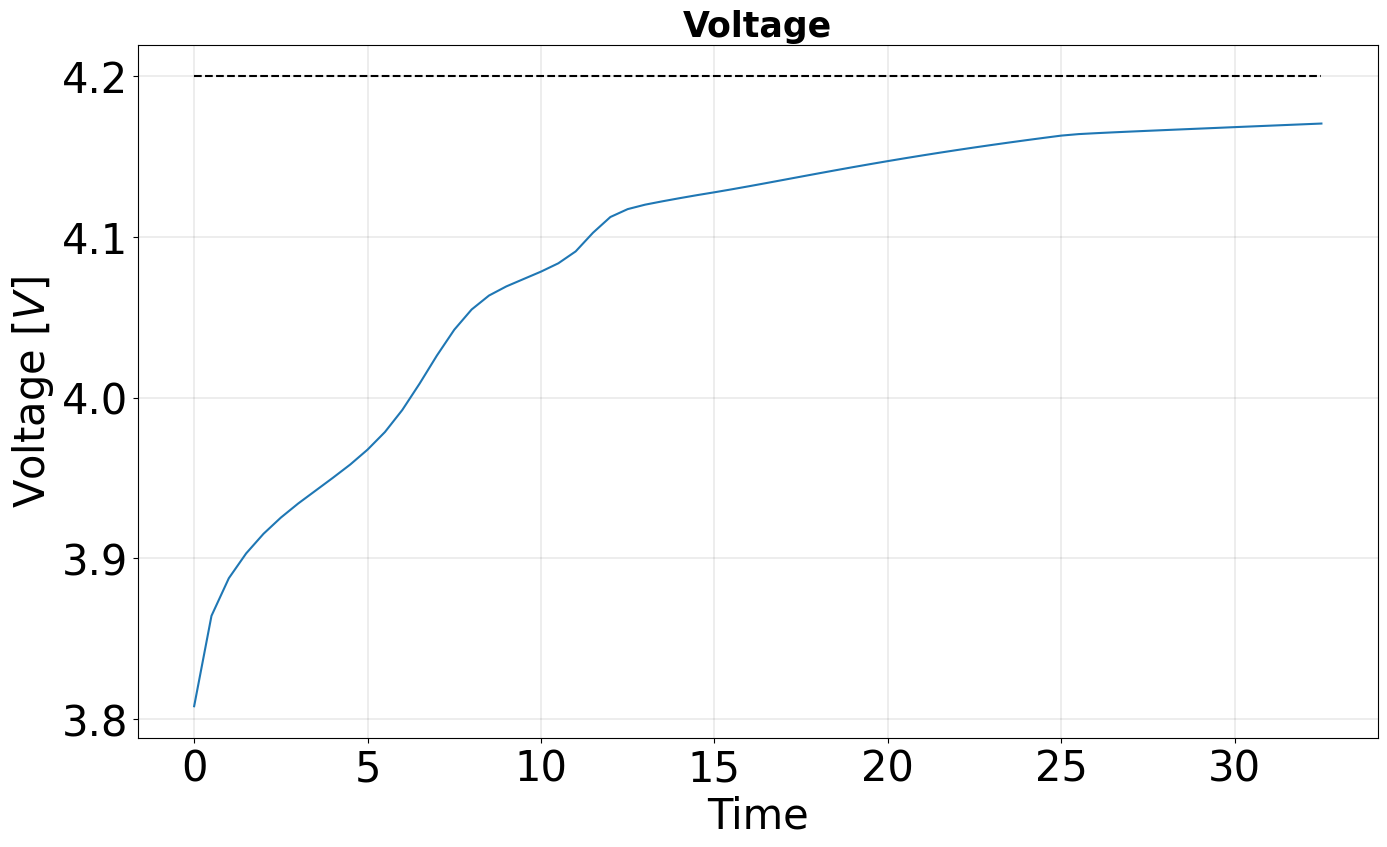

In [64]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)


volt_th = control_settings['constraints']['voltage']['max']
plt.plot(np.array(TIME_VEC[:-1])/60,np.array(VOLTAGE_VEC))
plt.plot(np.array(TIME_VEC[:-1])/60, volt_th*np.ones([len(VOLTAGE_VEC),]),'k--')
plt.title("Voltage", fontsize=25, fontweight="bold")
plt.ylabel('Voltage [$V$]', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.tick_params(labelsize=30)

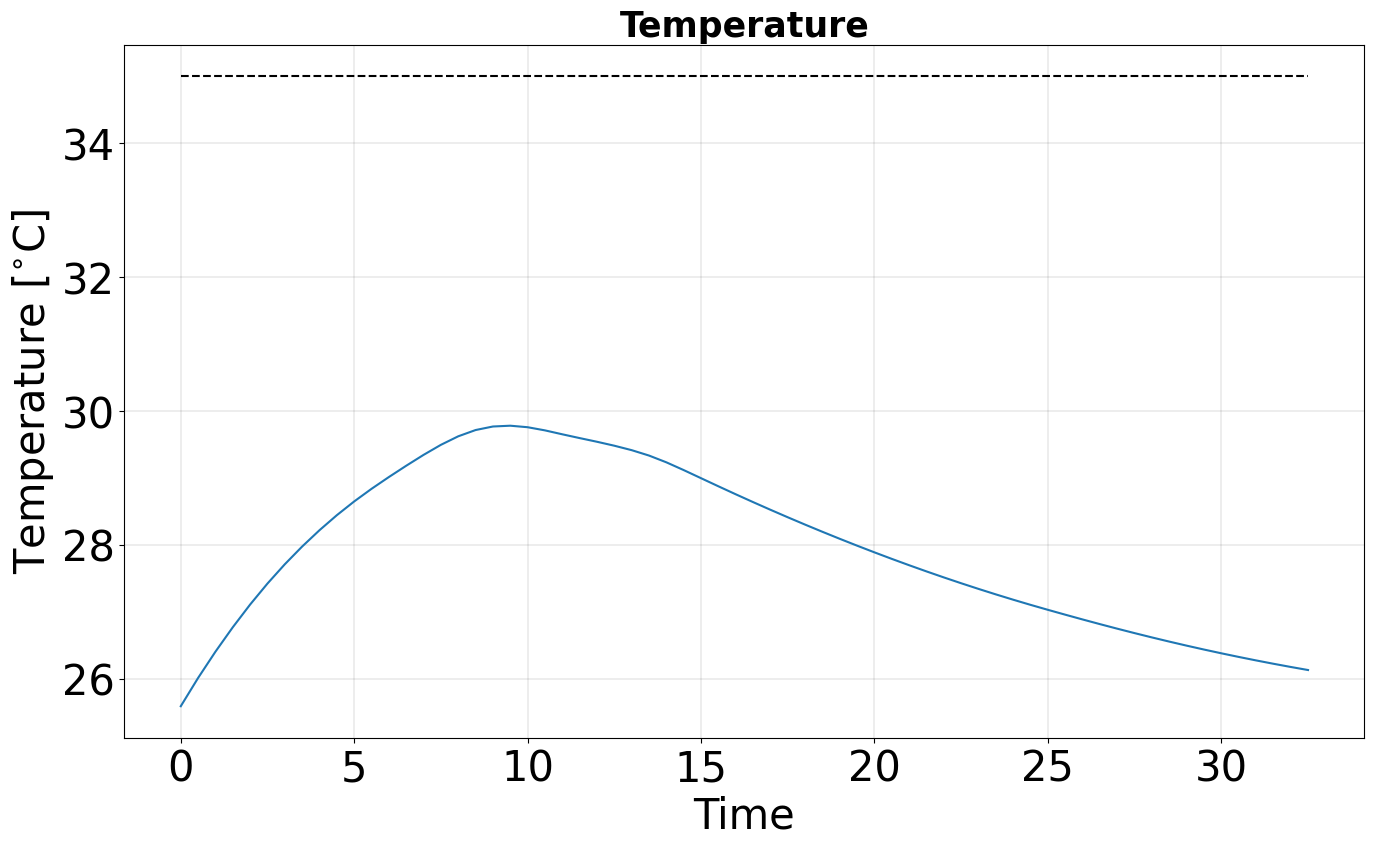

In [65]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)

temp_th = control_settings['constraints']['temperature']['max']

plt.plot(np.array(TIME_VEC[:-1])/60,np.array(T_VEC)-273)
plt.plot(np.array(TIME_VEC[:-1])/60,(temp_th-273)*np.ones([len(T_VEC),]),'k--')
plt.title("Temperature", fontsize=25, fontweight="bold")
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.tick_params(labelsize=30)



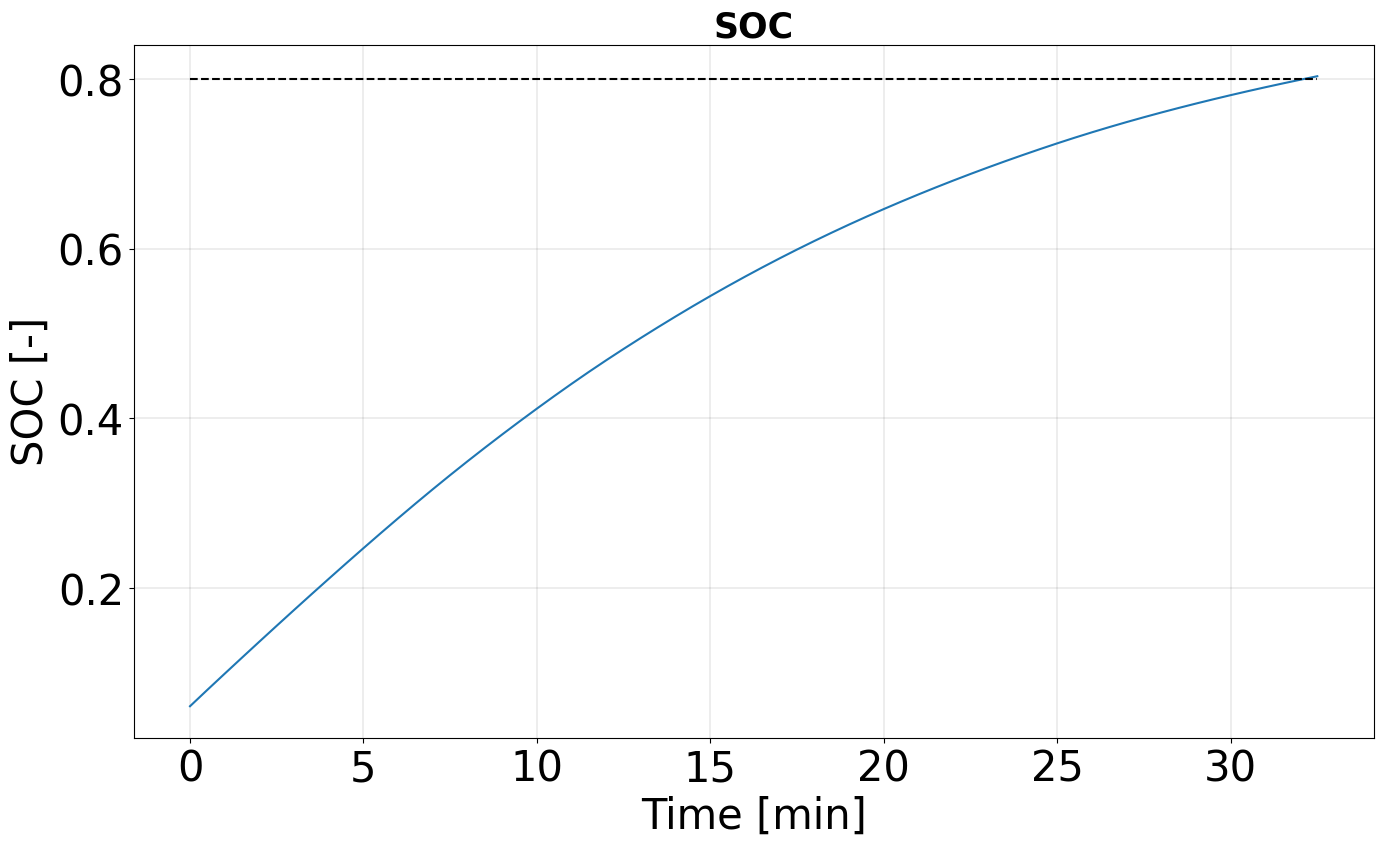

In [66]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)


plt.plot(np.array(TIME_VEC[:-1])/60,np.array(SOC_VEC))
plt.plot(np.array(TIME_VEC[:-1])/60,0.8*np.ones([len(SOC_VEC),]),'k--')
plt.title("SOC", fontsize=25, fontweight="bold")
plt.ylabel('SOC [-]', fontsize=30)
plt.xlabel('Time [min]', fontsize=30)
plt.tick_params(labelsize=30)


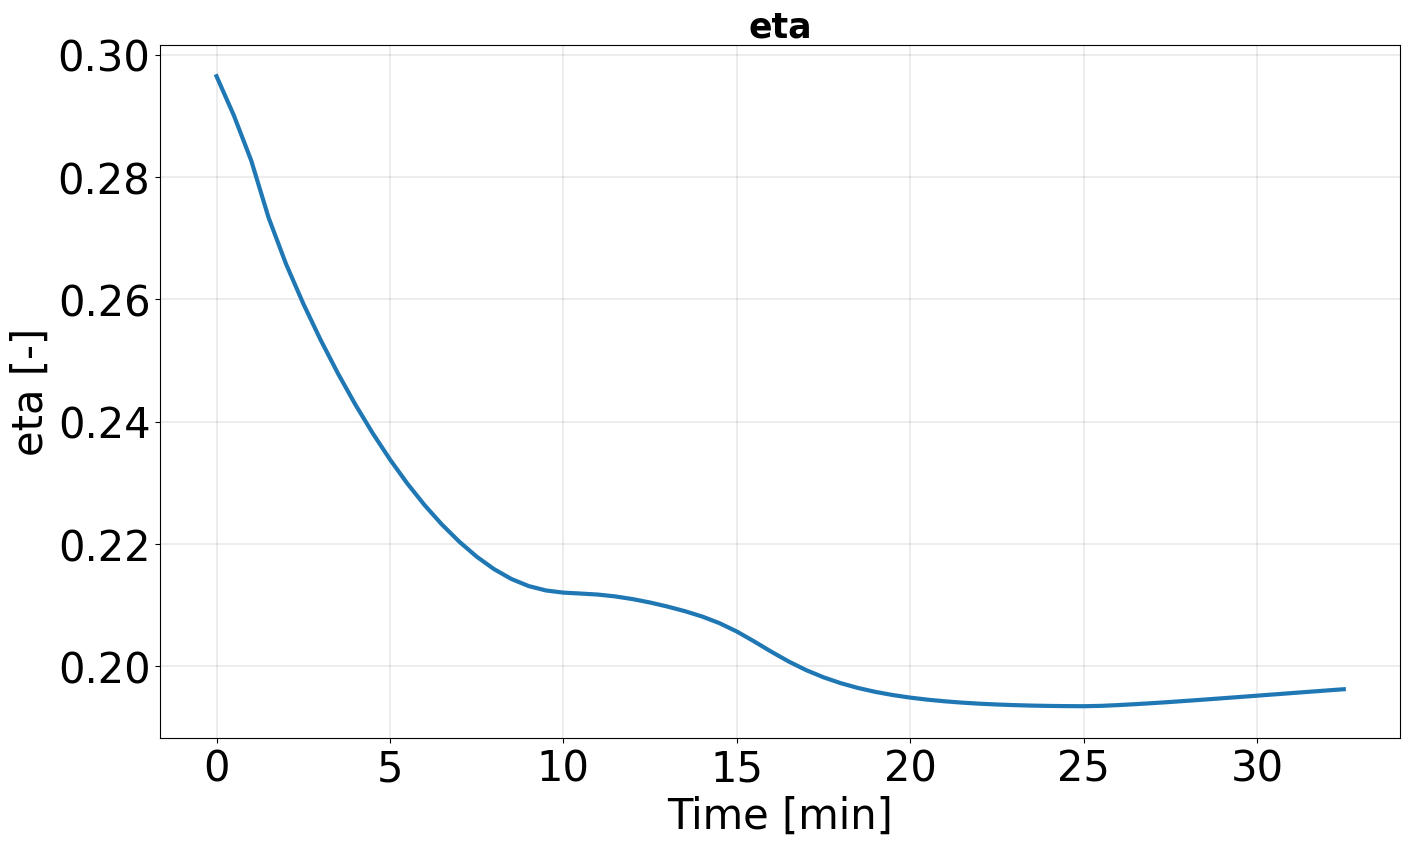

In [67]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.set_facecolor("white")
ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)


plt.plot(np.array(TIME_VEC[:-1])/60,np.array(etasLn_sim), linewidth=3)
plt.title("eta", fontsize=25, fontweight="bold")
plt.ylabel('eta [-]', fontsize=30)
plt.xlabel('Time [min]', fontsize=30)
plt.tick_params(labelsize=30)

In [68]:
torch.__version__

'2.1.1+cu121'

In [69]:
csn0, csp0 = init_cs_LCO(p, init_V) #init_cs_NMC(p, init_v) #init_cs_NMC(p, init_v) #init_cs_LCO(p, init_v)
SOCn = csn0/p['c_s_n_max']
#given initial voltage, every particle in the anode should have csn0, and vice versa

Nn = p['Nxn']-1
Ns = p['Nxs']-1
Np = p['Nxp']-1
Nnp = Nn + Np
c_s_n_pade0 = np.zeros((p['PadeOrder'],1))
c_s_p_pade0 = np.zeros((p['PadeOrder'],1))

c_s_n_pade0[2] = csn0
c_s_p_pade0[2] = csp0

c_s_n = mb.repmat(c_s_n_pade0,Nn,1)#vertical concatenation
c_s_p = mb.repmat(c_s_p_pade0,Np,1)

# print(c_s_n)

c_s_n_mat = ca.reshape(c_s_n,(p['PadeOrder'],p['Nxn']-1)) # --- Pade
c_s_p_mat = ca.reshape(c_s_p,(p['PadeOrder'],p['Nxn']-1))

# print(c_s_n_mat[:,0])